# kmeans

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import  davies_bouldin_score
from sklearn.decomposition import PCA

In [168]:
# Se carga el archivo CSV 
df = pd.read_csv('C:/Users/57320/Documents/UNAD/Analisis de datos/Tarea 4/Mall_Customers.csv')

print("Primeras 5 filas del dataset:")
print(df.head())

Primeras 5 filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [170]:
# Se calculan algunas estadísticas descriptivas
print("Estadísticas descriptivas:")
print(df.describe())



Estadísticas descriptivas:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [171]:
# Se comprueba si existen valores nulos
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())



Cantidad de valores nulos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


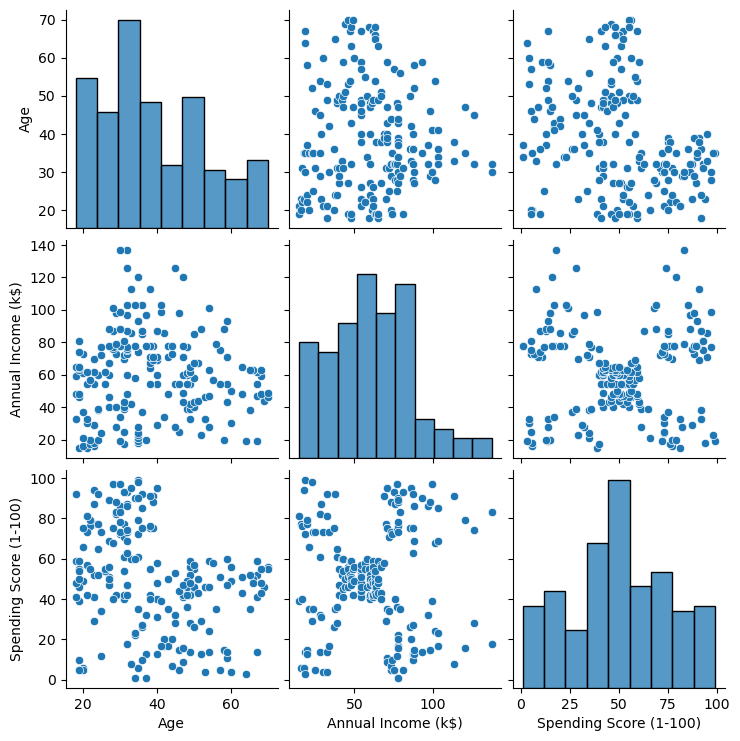

In [172]:
# Se visualiza la distribución de variables numéricas


sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()



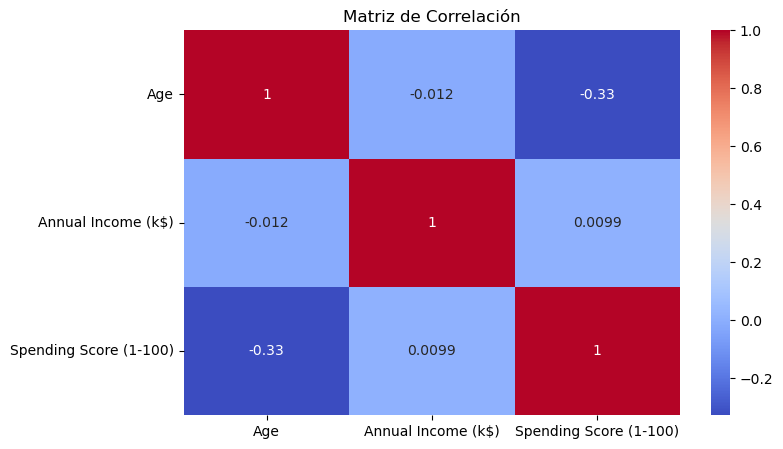

In [173]:
# Matríz de correlación
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [175]:
# Se elimina la columna 'CustomerID' 
df = df.drop('CustomerID', axis=1)

# Se codifica la variable categórica 'Gender'
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Se estandarizan las variables numéricas

scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)

In [176]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,-1.424569,-1.738999,-0.434801
1,0,-1.281035,-1.738999,1.195704
2,1,-1.352802,-1.700830,-1.715913
3,1,-1.137502,-1.700830,1.040418
4,1,-0.563369,-1.662660,-0.395980


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [178]:


# Se seleccionan las características con varianza mayor a un umbral 
selector = VarianceThreshold(threshold=0.11)
X_selected = selector.fit_transform(df)

# Se obtienen los nombres de las columnas seleccionadas
selected_columns = df.columns[selector.get_support()]
print(f" Nombres de las características seleccionadas: {selected_columns}")

# Se convierten a dataframe  las columnas seleccionadas
X = pd.DataFrame(X_selected, columns=selected_columns)

 Nombres de las características seleccionadas: Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


## 4. Entrenar el modelo configurando los diferentes hiperparámetros.


C:\Users\57320\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\57320\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\57320\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\57320\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

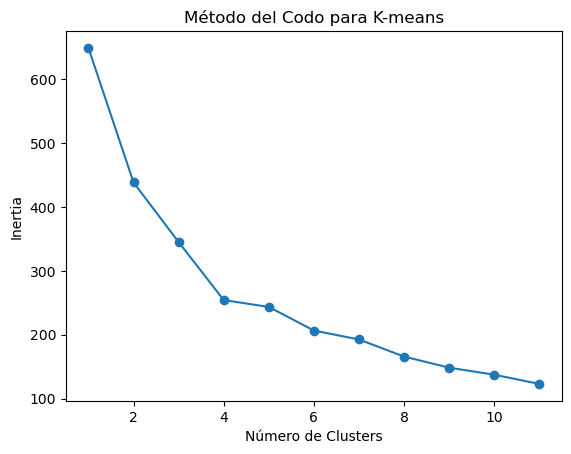

In [180]:


# Se utiliza el método del codo para determinar el número óptimo de clusters
inertia = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=45)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Se grafica el método del codo
plt.plot(range(1, 12), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo para K-means')
plt.show()



C:\Users\57320\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\57320\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\57320\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\57320\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

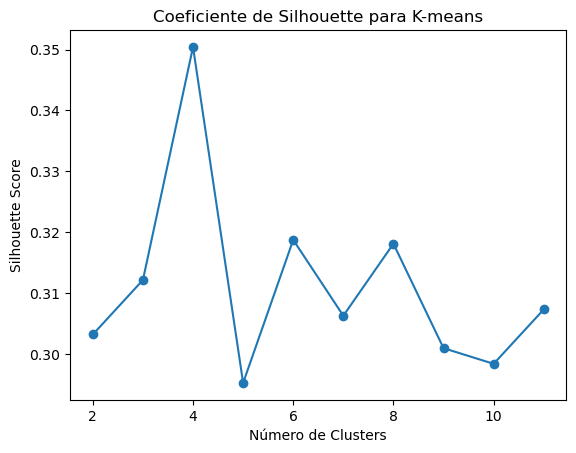

In [181]:
# Se utiliza el coeficiente de silhouette para determinar el número óptimo de clusters
silhouette_scores = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=45)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Se grafica el coeficiente de silhouette
plt.plot(range(2, 12), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Coeficiente de Silhouette para K-means')
plt.show()



C:\Users\57320\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\57320\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\57320\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\57320\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

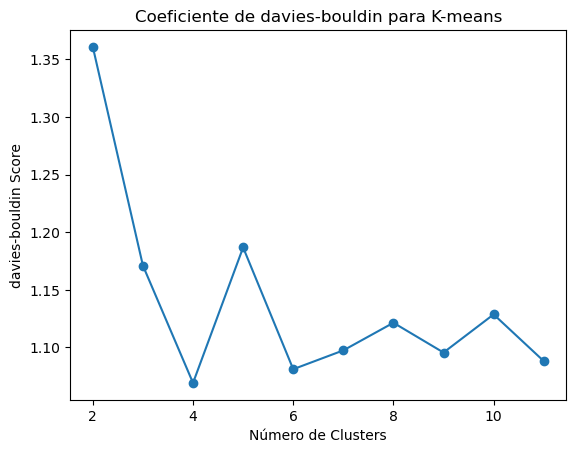

In [182]:
# Se utiliza el coeficiente de davies para determinar el número óptimo de clusters
davies_scores = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=45)
    labels = kmeans.fit_predict(X)
    davies_scores.append(davies_bouldin_score(X, labels))

# Se grafica el coeficiente de davies
plt.plot(range(2, 12), davies_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('davies-bouldin Score')
plt.title('Coeficiente de davies-bouldin para K-means')
plt.show()

In [183]:
# Se entrena el modelo con el número óptimo de clusters 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=45)
kmeans_labels = kmeans.fit_predict(X)

C:\Users\57320\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [185]:


# Coeficiente de Silhouette
kmeans_silhouette = silhouette_score(X, kmeans_labels)

print(f'Silhouette Score - K-means: {kmeans_silhouette:.2f}')




Silhouette Score - K-means: 0.35


In [186]:
# Índice de Calinski-Harabasz
kmeans_calinski = calinski_harabasz_score(X, kmeans_labels)

print(f'Calinski-Harabasz Index - K-means: {kmeans_calinski:.2f}')


Calinski-Harabasz Index - K-means: 101.44


In [187]:
# Índice de Davies-Bouldin
kmeans_davies_bouldin = davies_bouldin_score(X, kmeans_labels)

print(f'Davies-Bouldin Index - K-means: {kmeans_davies_bouldin:.2f}')


Davies-Bouldin Index - K-means: 1.07


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [189]:
# Se agrega la columna correspondiente a las etiquetas de clusters al dataframe original
df['KMeans_Cluster'] = kmeans_labels





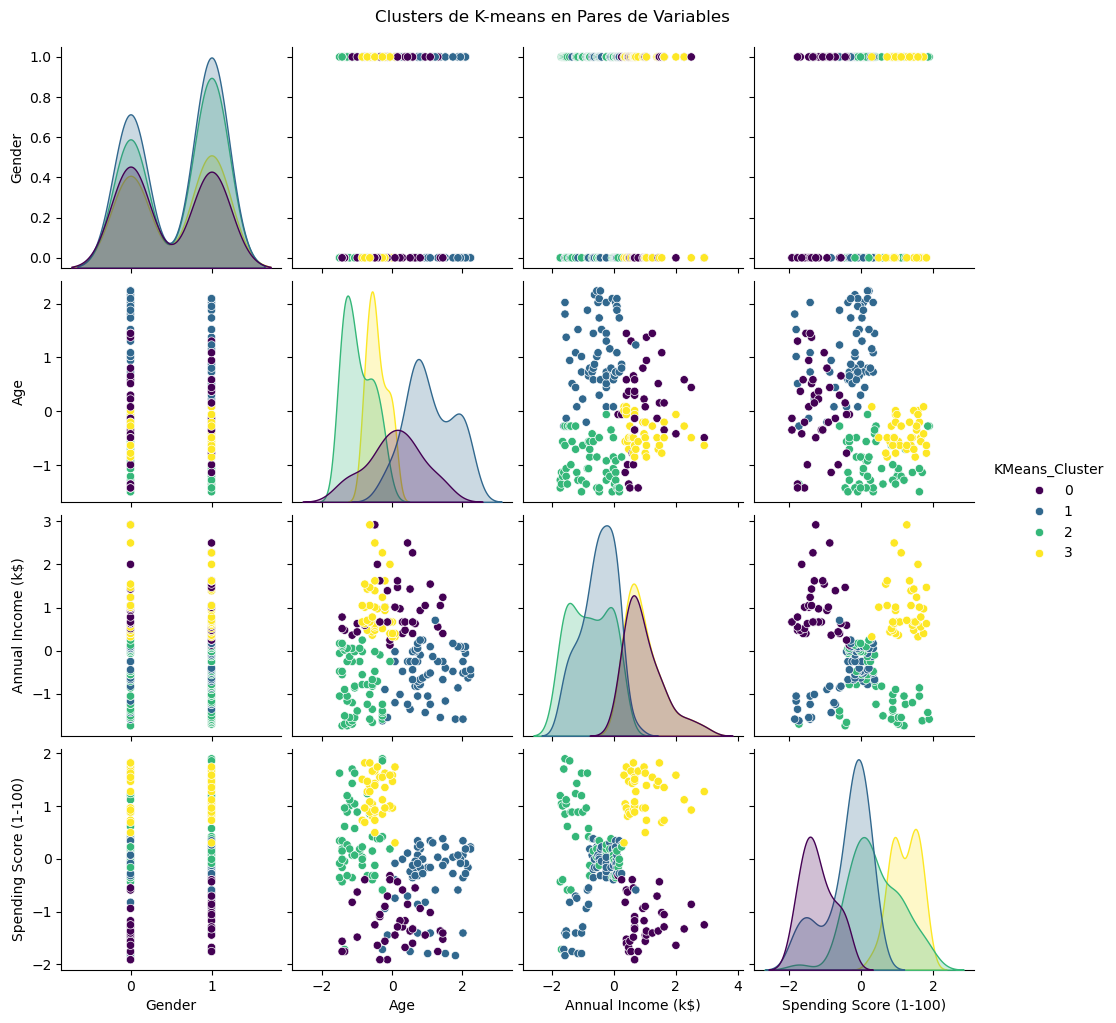

In [190]:
sns.pairplot(df, hue='KMeans_Cluster', vars=['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)'], palette='viridis')
plt.suptitle('Clusters de K-means en Pares de Variables', y=1.02)
plt.show()

In [191]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster
0,0,-1.424569,-1.738999,-0.434801,2
1,0,-1.281035,-1.738999,1.195704,2
2,1,-1.352802,-1.700830,-1.715913,2
3,1,-1.137502,-1.700830,1.040418,2
4,1,-0.563369,-1.662660,-0.395980,2


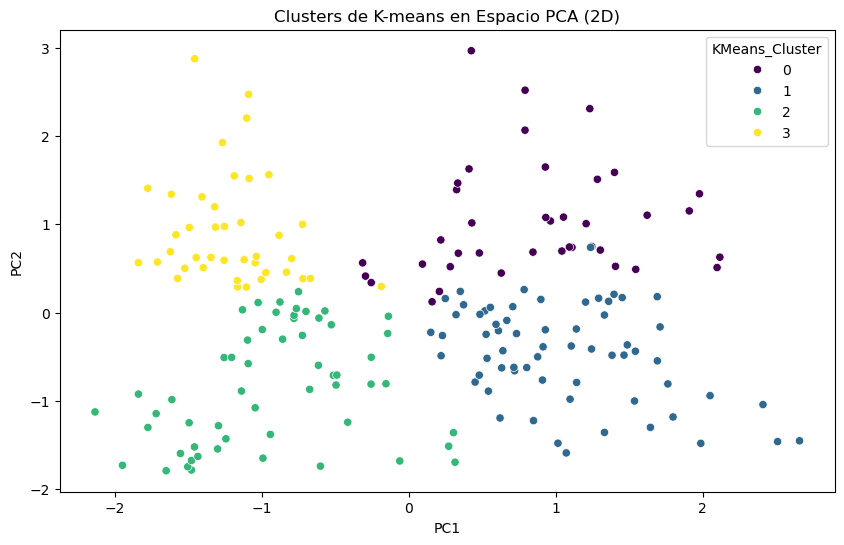

In [192]:



# Se utiliza PCA para reducir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Creamos un DataFrame con los resultados de PCA y los clusters
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['KMeans_Cluster'] = df['KMeans_Cluster']

# Graficamos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='KMeans_Cluster', palette='viridis')
plt.title('Clusters de K-means en Espacio PCA (2D)')
plt.show()

## 7. Interpretar, analizar y documentar los resultados obtenidos.

#### Análisis exploratorio

No se encontraron valores nulos, también se encontró que las personas más jóvenes menores a 40 años, tenían un score mas alto en cuanto a gasto de dinero en el mall comparado con las personas de mayor edad. Al observar la matriz de correlación podemos observar una correlación lineal negativa débil entre la edad y el score de gasto. Por lo tanto la matriz de correlación y el gráfico de dispersión concuerdan.

#### Limpieza y Procesamiento

En esta etapa se realizó codificación de la columna gender, para que tomara valores de 0 y 1. También se eliminó la columna 'CustomerID'. El algoritmo kmeans solicita que los datos esten estandarizados, por lo tanto también se realizó este proceso.

#### Selección de Características

Para esta etapa, se utilizó la función  VarianceThreshold para eliminar las columnas que tenían baja varianza. Sin embargo se encontró que todas las variables contenían más varianza que el umbral 0.1. 

#### Entrenamiento de Kmeans

Para el entrenamiento de kmeans, se utilizaron 3 métricas (el codo, Davies-Bouldin, Silhouette Score) las cuales nos ayudaron a determinar que el número de clusters adecuado es 4.

#### Métricas para evaluar el desempeño del Modelo

Silhouette Score - K-means: 0.35,  evalúa la calidad del clustering al comparar qué tan separados están los clusters entre sí y qué tan compactos están dentro de sí mismos. Un valor más alto indica un mejor clustering, con clusters densos y bien separados.

Calinski-Harabasz Index - K-means: 101.44,  evalúa la calidad del clustering al comparar qué tan separados están los clusters entre sí y qué tan compactos están dentro de sí mismos. Un valor más alto indica un mejor clustering, con clusters densos y bien separados.

Davies-Bouldin Index - K-means: 1.07,  es una métrica que evalúa la calidad del clustering comparando la dispersión dentro de los clusters con la separación entre ellos. Un valor más bajo de este índice indica un mejor clustering, con clusters compactos y bien separados.

#### Anális gráfico del resultado de kmeans

Para poder observar las cuatro variables en cada cluster se realizaron dos enfoques: diagramas de dispersión entre todas las variables y reducción de dimensionalidad mediante PCA. En el gráfico de PCA se observó una muy buena separación entre los clusters. 